# Random Forest

In [178]:
#Add libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [179]:
#Get data
iris= datasets.load_iris()

In [180]:
#View categories
dir(iris)

#Convert to data
df=pd.DataFrame(iris.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [181]:
df['target']=iris.target
df.head()

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Feature Engineering

In [182]:
# Check data types
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [183]:
# Check missing values in X_train
df.isnull().sum()

0         0
1         0
2         0
3         0
target    0
dtype: int64

### Split Data

In [184]:
X = df.drop('target', axis='columns')
Y = df['target']

In [185]:
#Split data into separate training and test and test set
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.3, random_state=0)

### Training Classifier

In [186]:
model=RandomForestClassifier()

# Fit the model
model.fit(X_train, Y_train)

RandomForestClassifier()

### Predict the Results

In [187]:
Y_pred = model.predict(X_test)

Y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

### Check Accuracy Score

In [188]:
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test, Y_pred)))

Y_pred_train = model.predict(X_train)
Y_pred_train

Model accuracy score: 0.9778


array([1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1,
       2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1,
       1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [189]:
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(Y_train, Y_pred_train)))

# Print the scores on training and test set
print('Training set score: {:.4f}'.format(model.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, Y_test)))

Training-set accuracy score: 1.0000
Training set score: 1.0000
Test set score: 0.9778


In [190]:
# Check class distribution in test set
null_info = Y_test.value_counts()
null_info

1    18
0    16
2    11
Name: target, dtype: int64

In [191]:
# Check Null Accuracy Score
null_accuracy = null_info.iloc[0] / (null_info.iloc[0] + null_info.iloc[1])
print('Null accuracy score: {0:0.4f}'.format(null_accuracy))

Null accuracy score: 0.5294


In [192]:
# Print the Confusion Matrix and slice it into four pieces
cm = confusion_matrix(Y_test, Y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0, 0])

print('\nTrue Negatives(TN) = ', cm[1, 1])

print('\nFalse Positives(FP) = ', cm[0, 1])

print('\nFalse Negatives(FN) = ', cm[1, 0])

Confusion matrix

 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]

True Positives(TP) =  16

True Negatives(TN) =  17

False Positives(FP) =  0

False Negatives(FN) =  0


<Axes: >

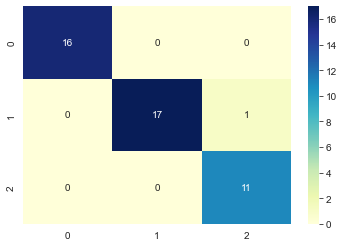

In [193]:
# Visualise confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [194]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [195]:
# Print classification accuracy

TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 1.0000


In [196]:
# Print Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0000


In [197]:
#Print Precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [198]:
#Print Recall
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 1.0000


In [199]:
#True positive Rate
TPR = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(TPR))

True Positive Rate : 1.0000


In [200]:
#False positive rate
FPR = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(FPR))

False Positive Rate : 0.0000


In [201]:
#Specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 1.0000


### Calculate Class Probabilities

In [202]:
# Print the first 10 predicted probabilities of two classes- 0 and 1

Y_pred_prob = model.predict_proba(X_test)[0:10]
Y_pred_prob

array([[0.  , 0.  , 1.  ],
       [0.  , 0.94, 0.06],
       [0.98, 0.02, 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.02, 0.98],
       [1.  , 0.  , 0.  ],
       [0.  , 0.99, 0.01],
       [0.  , 0.92, 0.08],
       [0.  , 0.98, 0.02]])

In [203]:
# Store the probabilities in dataframe
Y_pred_prob_df = pd.DataFrame(data=Y_pred_prob, columns=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
Y_pred_prob_df

,Iris-setosa,Iris-versicolor,Iris-virginica
0,0.00,0.00,1.00
1,0.00,0.94,0.06
2,0.98,0.02,0.00
3,0.00,0.00,1.00
4,1.00,0.00,0.00
5,0.00,0.02,0.98
6,1.00,0.00,0.00
7,0.00,0.99,0.01
8,0.00,0.92,0.08
9,0.00,0.98,0.02


In [204]:
# Print the first 10 predicted probabilities for class 1 - Probability of stroke
model.predict_proba(X_test)[0:10, 1]

array([0.  , 0.94, 0.02, 0.  , 0.  , 0.02, 0.  , 0.99, 0.92, 0.98])

In [205]:
# Store the predicted probabilities for class 1 - Probability of stroke
Y_pred1 = model.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

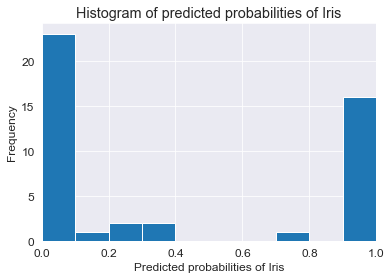

In [206]:
# Plot histogram of predicted probabilities

# adjust the font size
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(Y_pred1, bins=10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Iris')

# set the x-axis limit
plt.xlim(0, 1)

# set the title
plt.xlabel('Predicted probabilities of Iris')
plt.ylabel('Frequency')

In [207]:
# Applying 10-Fold Cross Validation
scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.90909091 1.         0.90909091 1.         1.         1.
 1.         0.7        1.         0.9       ]


In [208]:
# Compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9418
